In [1]:
import pandas as pd
import numpy as np
from perceptron import PocketPerceptron
import matplotlib.pyplot as plt

In [2]:
blobs = pd.read_csv('../data/blobs2.csv')

In [3]:
blobs.loc[blobs.label == 0, 'label'] = -1

# 2

In [4]:
perceptron = PocketPerceptron(max_iterations=50, early_stop=True)

In [5]:
perceptron.fit(blobs[['x', 'y']].values, blobs.label.values)

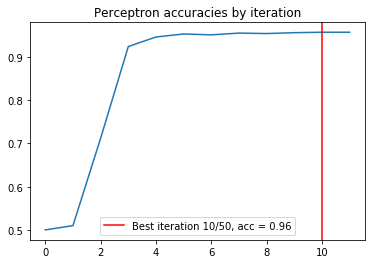

In [6]:
plt.title('Perceptron accuracies by iteration')
plt.plot(perceptron.accuracies)
best = np.argmax(perceptron.accuracies)
plt.axvline(best, c='red', label=f'Best iteration {best}/{perceptron.max_iterations}, acc = {max(perceptron.accuracies):.2f}')
plt.legend()

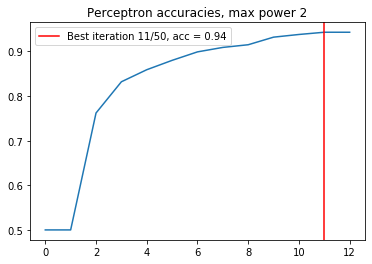

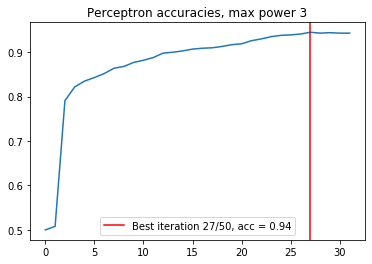

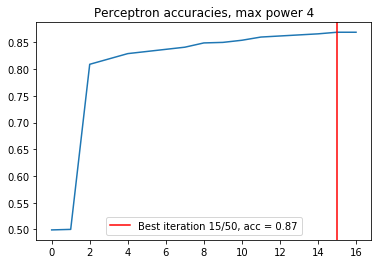

In [12]:
for power in range(2, 5):
    blobs[f'x_{power}'], blobs[f'y_{power}'] = blobs.x**power, blobs.y**power
    perceptron = PocketPerceptron(max_iterations=50, early_stop=True)
    perceptron.fit(blobs.drop(['label'], axis=1).values, blobs.label.values)
    
    plt.title(f'Perceptron accuracies, max power {power}')
    plt.plot(perceptron.accuracies)
    best = np.argmax(perceptron.accuracies)
    plt.axvline(best, c='red', 
                label=f'Best iteration {best}/{perceptron.max_iterations}, acc = {max(perceptron.accuracies):.2f}')
    plt.legend()
    plt.show()